<a href="https://colab.research.google.com/github/BertanTurgut/BertanTurgut/blob/main/Pytorch_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1078]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

In [1079]:
df = pd.read_csv("car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [1080]:
for column in df:
  print("## " + column + ":")
  print(df[column].unique())

## Car_Name:
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220'

In [1081]:
eng_df = df.copy()
eng_df = eng_df.drop(["Car_Name"], axis=1)
km_min = eng_df["Kms_Driven"].min()
km_max = eng_df["Kms_Driven"].max()
for i in eng_df.index:
  eng_df.loc[i, "Year"] = eng_df.loc[i, "Year"]/100
  eng_df.loc[i, "Kms_Driven"] = round((eng_df.loc[i, "Kms_Driven"]-km_min)*10/(km_max-km_min), 4)
  match eng_df.loc[i, "Fuel_Type"]:
    case "Petrol":
      eng_df.loc[i, "Fuel_Type"] = 0
    case "Diesel":
      eng_df.loc[i, "Fuel_Type"] = 1
    case "CNG":
      eng_df.loc[i, "Fuel_Type"] = 2
  match eng_df.loc[i, "Seller_Type"]:
    case "Dealer":
      eng_df.loc[i, "Seller_Type"] = 0
    case "Individual":
      eng_df.loc[i, "Seller_Type"] = 1
  match eng_df.loc[i, "Transmission"]:
    case "Manual":
      eng_df.loc[i, "Transmission"] = 0
    case "Automatic":
      eng_df.loc[i, "Transmission"] = 1
eng_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,20.14,3.35,5.59,0.5305,0,0,0,0
1,20.13,4.75,9.54,0.8509,1,0,0,0
2,20.17,7.25,9.85,0.1281,0,0,0,0
3,20.11,2.85,4.15,0.0941,0,0,0,0
4,20.14,4.60,6.87,0.8398,1,0,0,0
...,...,...,...,...,...,...,...,...
296,20.16,9.50,11.60,0.6704,1,0,0,0
297,20.15,4.00,5.90,1.1912,0,0,0,0
298,20.09,3.35,11.00,1.7504,0,0,0,0
299,20.17,11.50,12.50,0.1702,1,0,0,0


In [1082]:
for column in eng_df:
  print("## " + column + ":")
  print(eng_df[column].unique())

## Year:
[20.14 20.13 20.17 20.11 20.18 20.15 20.16 20.09 20.1  20.12 20.03 20.08
 20.06 20.05 20.04 20.07]
## Selling_Price:
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3
 10.

In [1083]:
# neural network will predict the "Present_Price"
X_train = eng_df.drop(["Present_Price"], axis=1)
X_train = X_train.loc[:250]
Y_train = eng_df.filter(["Present_Price"], axis=1)
Y_train = Y_train.loc[:250]
X_test = eng_df.drop(["Present_Price"], axis=1)
X_test = X_test.loc[251:]
Y_test = eng_df.filter(["Present_Price"], axis=1)
Y_test = Y_test.loc[251:]
X_train = torch.FloatTensor(X_train.values.astype(float))
Y_train = torch.FloatTensor(Y_train.values.astype(float))
X_test = torch.FloatTensor(X_test.values.astype(float))
Y_test = torch.FloatTensor(Y_test.values.astype(float))
X_test

tensor([[20.1300,  5.0000,  1.1251,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1500,  5.4000,  0.6192,  0.0000,  0.0000,  1.0000,  0.0000],
        [20.1400,  7.2000,  0.9510,  1.0000,  0.0000,  0.0000,  0.0000],
        [20.1300,  5.2500,  1.0759,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1200,  3.0000,  1.0646,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1600, 10.2500,  0.9822,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1500,  8.5000,  0.7973,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1500,  8.4000,  0.4905,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1400,  3.9000,  0.7118,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1600,  9.1500,  0.5750,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1600,  5.5000,  0.1021,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1500,  4.0000,  0.7913,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1600,  6.6000,  0.3104,  0.0000,  0.0000,  0.0000,  0.0000],
        [20.1500,  4.0000,  0.7913,  0.0000,  0.000

In [1084]:
class Model(nn.Module):
  def __init__(self, input_features, hl1, hl2, out_features):
    super().__init__()
    self.fully_connected1 = nn.Linear(input_features, hl1)
    self.fully_connected2 = nn.Linear(hl1, hl2)
    self.output = nn.Linear(hl2, out_features)
  def forward(self, x):
    x = F.relu(self.fully_connected1(x))
    x = F.relu(self.fully_connected2(x))
    x = F.relu(self.output(x))
    return x

In [1085]:
model = Model(7, 6, 5, 1)
print(model)
print(model.parameters)

Model(
  (fully_connected1): Linear(in_features=7, out_features=6, bias=True)
  (fully_connected2): Linear(in_features=6, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=1, bias=True)
)
<bound method Module.parameters of Model(
  (fully_connected1): Linear(in_features=7, out_features=6, bias=True)
  (fully_connected2): Linear(in_features=6, out_features=5, bias=True)
  (output): Linear(in_features=5, out_features=1, bias=True)
)>


In [1086]:
loss_func = nn.MSELoss()
optimizer_func = SGD(model.parameters(), lr=0.0001)
epoch = 1000
losses = []
loss_delta = []
for i in range(epoch):
  Y_prediction = model.forward(X_train)
  loss = loss_func(Y_prediction, Y_train)
  losses.append(loss.item())
  if i != 0:
    loss_delta.append(loss.item()-losses[i-1])
  optimizer_func.zero_grad()
  loss.backward()
  optimizer_func.step()
  if i % 100 == 0:
    print(f"Epoch: {i} | Loss: {loss} | Delta Loss: {loss.item()-losses[i-1]}")

Epoch: 0 | Loss: 126.52362823486328 | Delta Loss: 0.0
Epoch: 100 | Loss: 66.70581817626953 | Delta Loss: -0.20166015625
Epoch: 200 | Loss: 42.37036895751953 | Delta Loss: -0.2860221862792969
Epoch: 300 | Loss: 21.57670021057129 | Delta Loss: -0.07428550720214844
Epoch: 400 | Loss: 19.595073699951172 | Delta Loss: -0.0028018951416015625
Epoch: 500 | Loss: 19.403907775878906 | Delta Loss: -0.0015316009521484375
Epoch: 600 | Loss: 19.25109100341797 | Delta Loss: -0.00150299072265625
Epoch: 700 | Loss: 19.10789680480957 | Delta Loss: -0.001312255859375
Epoch: 800 | Loss: 18.970863342285156 | Delta Loss: -0.0013103485107421875
Epoch: 900 | Loss: 18.83888053894043 | Delta Loss: -0.0013275146484375


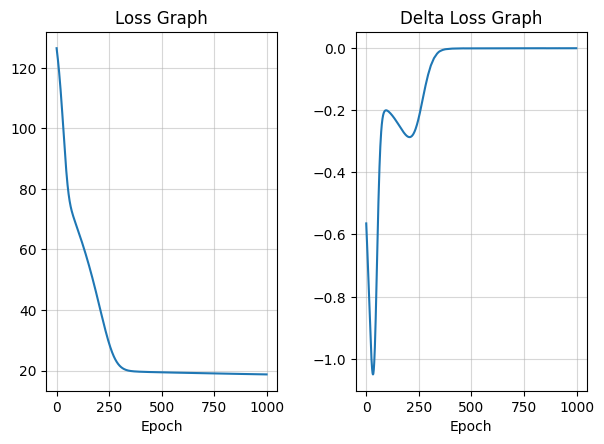

In [1087]:
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.grid(alpha=0.5)
plt.subplot(1, 2, 2)
plt.plot(loss_delta)
plt.title("Delta Loss Graph")
plt.xlabel("Epoch")
plt.grid(alpha=0.5)
plt.tight_layout(pad=2.0)
plt.show()

In [1088]:
with torch.no_grad():
  test_predictions = model.forward(X_test)
test_predictions = test_predictions.numpy()
Y_test = Y_test.numpy()

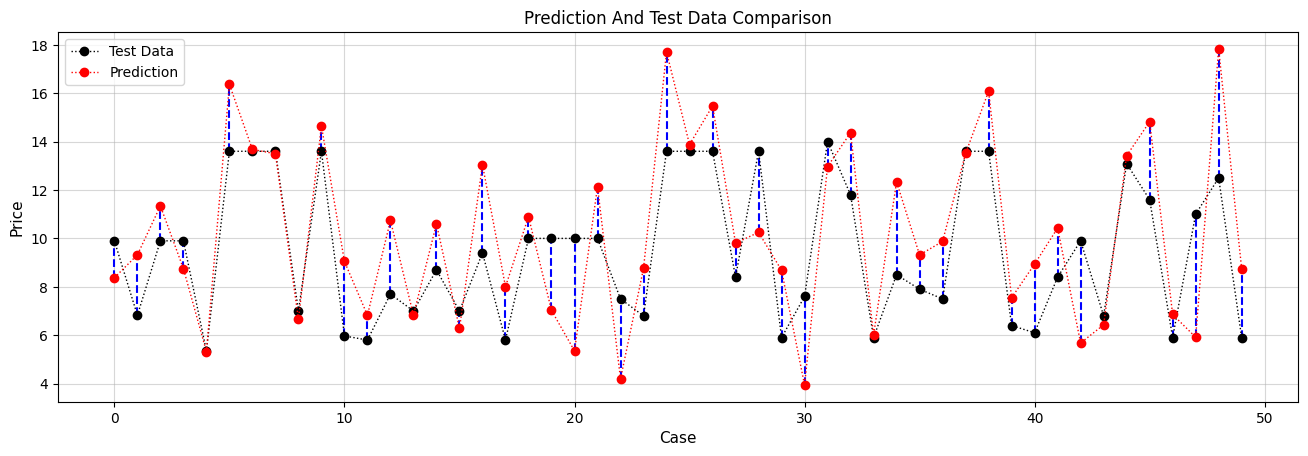

In [1089]:
plt.figure(figsize=(16, 4.8))
for i in range(len(Y_test)):
  plt.vlines(x=i, ymin=min(Y_test[i], test_predictions[i]), ymax=max(Y_test[i], test_predictions[i]), color="blue", ls="--")
plt.plot(Y_test, "o:k", markersize=6, linewidth=1, label="Test Data")
plt.plot(test_predictions, "o:r", markersize=6, linewidth=1, label="Prediction")
plt.grid(alpha=0.5)
plt.title("Prediction And Test Data Comparison")
plt.xlabel("Case", fontdict={"size":11})
plt.ylabel("Price", fontdict={"size":11})
plt.legend()
plt.show()